### Load spike times from Kilosort

In [ ]:
import h5py
import numpy as np

# --- Parameters ---
dat_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_data001.dat'  # path to raw data (time-major, KS-format)
h5_in_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_kilosort_data001_spike_times.h5'  # spikes times form mat file (KS), in seconds
sampling_rate = 20000  # Hz



# --- Load spike times and electrode positions from HDF5 ---
all_spikes = {}
with h5py.File(h5_in_path, 'r') as f:
    unit_ids = sorted(f['/spikes'].keys(), key=lambda x: int(x.split('_')[1]))
    for uid in unit_ids:
        unit_index = int(uid.split('_')[1])
        raw = f[f'/spikes/{uid}'][:]
        if raw.ndim == 1 and raw.shape[0] == 1:
            spikes_sec = np.array(raw[0]).flatten()
        else:
            spikes_sec = np.array(raw).flatten()
        spikes_samples = np.round(spikes_sec * sampling_rate).astype(np.int32)
        all_spikes[unit_index] = spikes_samples

    # Load electrode positions
    ei_positions = f['/ei_positions'][:].T  # shape is [512 x 2]




### Select cell to clean up and run verification

In [ ]:
from verify_cluster import verify_cluster

# parameters for verify_cluster
params = {
    'window': (-20, 60),
    'min_spikes': 100,
    'ei_sim_threshold': 0.75,
    'k_start': 4,
    'k_refine': 2
}

# choose cell ID (this is index of the cell, not vision ID)
spike_times = all_spikes[8]

# run recursive clustering
clusters = verify_cluster(
    spike_times=spike_times,
    dat_path=dat_path,
    params=params
)

print(f"Returned {len(clusters)} clean subclusters")
for i, cl in enumerate(clusters):
    print(f"  Cluster {i}: {len(cl['inds'])} spikes")

print("Success")


Final EI similarity matrix:
 [[1.   0.57]
 [0.57 1.  ]]
[verify_cluster] Merged down to 2 final clusters.
Returned 2 clean subclusters
  Cluster 0: 1263 spikes
  Cluster 1: 530 spikes


### Evaluate clusters

/home/alexth/python_code/Axolotl_v2/plot_ei_python.py:60: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle(positions[i], radii[i], color=color, alpha=alpha, edgecolor='none')


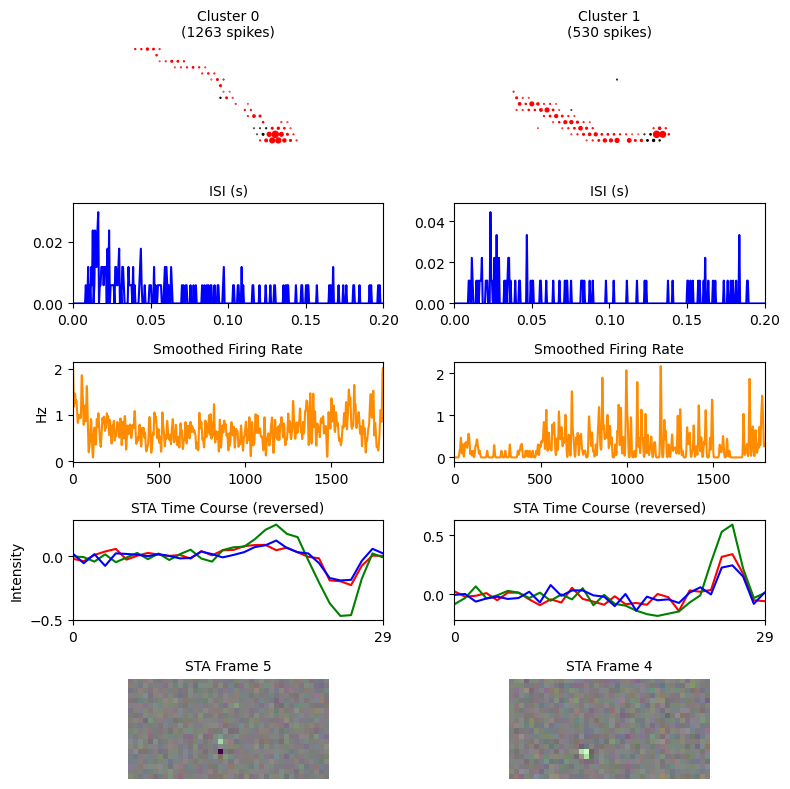

In [11]:
import analyze_clusters
import importlib
importlib.reload(analyze_clusters)

# plot EI (Vision style), ISI, firing rate, time course (from one pixel) and STA (single frame with strongest pixel)
analyze_clusters.analyze_clusters(clusters,
                 spike_times=spike_times,
                 sampling_rate=20000,
                 dat_path='/Volumes/Lab/Users/alexth/axolotl/201703151_data001.dat',
                 h5_path='/Volumes/Lab/Users/alexth/axolotl/201703151_kilosort_data001_spike_times.h5',
                 triggers_mat_path='/Volumes/Lab/Users/alexth/axolotl/trigger_in_samples_201703151.mat',
                 cluster_ids=None,
                 lut=None,
                 sta_depth=30,
                 sta_offset=0,
                 sta_chunk_size=1000,
                 sta_refresh=2,
                 ei_scale=3,
                 ei_cutoff=0.08)

### plot EI as waveforms

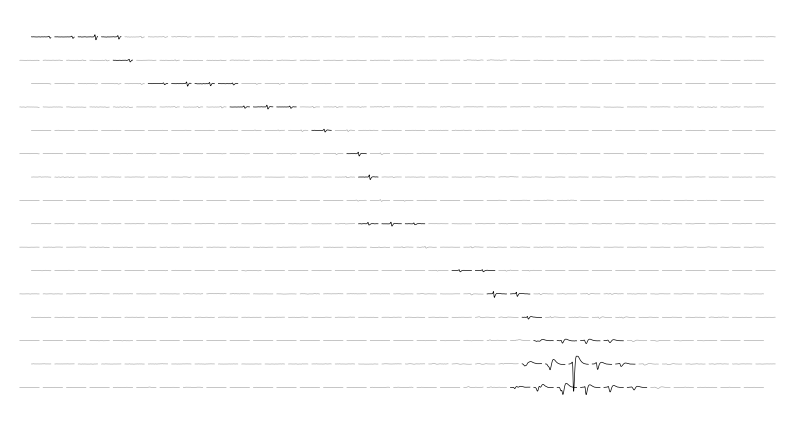

In [10]:
import plot_ei_waveforms
import importlib
importlib.reload(plot_ei_waveforms)
import matplotlib.pyplot as plt
import h5py
import numpy as np

# reload positions if needed
h5_path = '/Volumes/Lab/Users/alexth/axolotl/201703151_kilosort_data001_spike_times.h5'
with h5py.File(h5_path, 'r') as f:
    # Load electrode positions
    ei_positions = f['/ei_positions'][:].T  # [512 x 2]

# choose cluster to plot EI - single cell. The function can plot EI list as well
ei = clusters[0]['ei']

plt.figure(figsize=(10,10))
plot_ei_waveforms.plot_ei_waveforms(ei, ei_positions, scale=70.0, box_height=1.0, box_width=50.0, colors='black')
plt.show()


